Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted
  Clustering Type  F1-Score                 Conditions
0         K-Means  0.900000          Flat MLP Ordinary
1            Ward  0.900000          Flat MLP Ordinary
2         Average  0.890000          Flat MLP Ordinary
3        Complete  0.900000          Flat MLP Ordinary
4          Single  0.890000          Flat MLP Ordinary
5          Expert  0.860000          Flat MLP Ordinary
6         Dataset  0.850000          Flat MLP Ordinary
0         K-Means  0.290000              Flat MLP JSMA
1            Ward  0.290000              Flat MLP JSMA
2         Average  0.300000              Flat MLP JSMA
3        Complete  0.290000              Flat MLP JSMA
4          Single  0.330000              Flat MLP JSMA
5          Expert  0.310000              Flat MLP JSMA
6         Dataset  0.470000              Flat MLP JSMA
0         K-Means  0.880000  Hierarchy Layer1 

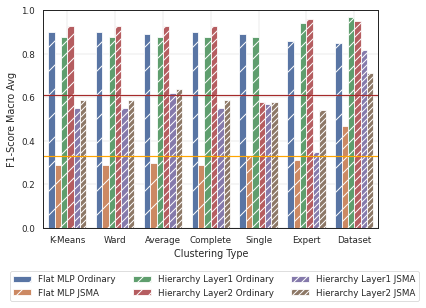

In [28]:
from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

import numpy as np
import pandas as pd
# Barplot

names = []


flat_original_f1_macros =[]
flat_jsma_f1_macros = []
hier_original_f1_macros =[]
hier_jsma_f1_macros = []
fine_hier_original_f1_macros =[]
fine_hier_jsma_f1_macros = []

hier_original_layer1 = []
hier_original_layer2 = []

hier_jsma_layer1 = []
hier_jsma_layer2 = []

conditions = []

# names.append('Flat MLP')
# original_f1_macros.append()
# jsma_f1_macros.append()
# conditions.append('Ordinary')
# conditions.append('JSMA')

# ==========================================

names.append('K-Means')
flat_original_f1_macros.append(0.90)
flat_jsma_f1_macros.append(0.29)

# hier_original_f1_macros.append(0.778761)
# hier_jsma_f1_macros.append(0.575221)

hier_original_layer1.append(0.88)
hier_original_layer2.append(0.93)

hier_jsma_layer1.append(0.55)
hier_jsma_layer2.append(0.59)

# ==========================================

names.append('Ward')

flat_original_f1_macros.append(0.90)
flat_jsma_f1_macros.append(0.29)

hier_original_layer1.append(0.88)
hier_original_layer2.append(0.93)

hier_jsma_layer1.append(0.55)
hier_jsma_layer2.append(0.59)

# ==========================================



names.append('Average')

flat_original_f1_macros.append(.89)
flat_jsma_f1_macros.append(0.30)


hier_original_layer1.append(0.88)
hier_original_layer2.append(0.93)

hier_jsma_layer1.append(0.62)
hier_jsma_layer2.append(0.64)

# ==========================================

names.append('Complete')

flat_original_f1_macros.append(0.90)
flat_jsma_f1_macros.append(0.29)


hier_original_layer1.append(0.88)
hier_original_layer2.append(0.93)

hier_jsma_layer1.append(0.55)
hier_jsma_layer2.append(0.59)


# ==========================================


names.append('Single')
flat_original_f1_macros.append(0.89)
flat_jsma_f1_macros.append(0.33)


hier_original_layer1.append(0.88)
hier_original_layer2.append(0.58)

hier_jsma_layer1.append(0.57)
hier_jsma_layer2.append(0.58)

# ==========================================

names.append('Expert')

flat_original_f1_macros.append(0.86)
flat_jsma_f1_macros.append(0.31)

hier_original_layer1.append(0.94)
hier_original_layer2.append(0.96)

hier_jsma_layer1.append(0.35)
hier_jsma_layer2.append(0.54)

# ==========================================

names.append('Dataset')

flat_original_f1_macros.append(0.85)
flat_jsma_f1_macros.append(0.47)

hier_original_layer1.append(0.9668067425279757)
hier_original_layer2.append(0.9507042253521126)

hier_jsma_layer1.append(0.821629884398586)
hier_jsma_layer2.append(0.7117536504264854)






for name in names:
  conditions.append('Flat MLP Ordinary')

for name in names:
  conditions.append('Flat MLP JSMA')


for name in names:
    conditions.append('Hierarchy Layer1 Ordinary')

for name in names:
    conditions.append('Hierarchy Layer2 Ordinary')

for name in names:
    conditions.append('Hierarchy Layer1 JSMA')

for name in names:
    conditions.append('Hierarchy Layer2 JSMA')


flat_orig_df = pd.DataFrame(np.column_stack([names, flat_original_f1_macros]), 
                               columns=['Clustering Type', 'F1-Score'])
flat_adversarial_df = pd.DataFrame(np.column_stack([names, flat_jsma_f1_macros]), 
                               columns=['Clustering Type', 'F1-Score'])

hier_orig_df = pd.DataFrame(np.column_stack([names, hier_original_layer1]), 
                               columns=['Clustering Type', 'F1-Score'])
hier_orig_df2 = pd.DataFrame(np.column_stack([names, hier_original_layer2]), 
                               columns=['Clustering Type', 'F1-Score'])

frames = [hier_orig_df,hier_orig_df2]

hier_orig_df = pd.concat(frames)


hier_adversarial_df = pd.DataFrame(np.column_stack([names, hier_jsma_layer1]), 
                               columns=['Clustering Type', 'F1-Score', ])

hier_adversarial_df2 = pd.DataFrame(np.column_stack([names, hier_jsma_layer2]), 
                               columns=['Clustering Type', 'F1-Score', ])

frames = [hier_adversarial_df,hier_adversarial_df2]

hier_adversarial_df = pd.concat(frames)



group_frames = [flat_orig_df,flat_adversarial_df, hier_orig_df,hier_adversarial_df]
group_df = pd.concat(group_frames)


group_df['Conditions'] = conditions
group_df[['F1-Score']] = group_df[['F1-Score']].apply(pd.to_numeric)
print(group_df)
group_df = group_df.round(decimals=2)
# group_df = group_df.sort_values('F1-Score')
# group_df = group_df.sort_values('Clustering Type')

import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')
sns.set_context("paper")
sns.color_palette("dark:salmon_r", as_cmap=True)

#create grouped bar chart hue_order={'Ordinary','Adversarial'}
bar = sns.barplot(x='Clustering Type', y='F1-Score', ci=95, hue='Conditions', hue_order=['Flat MLP Ordinary','Flat MLP JSMA',
                                                                             'Hierarchy Layer1 Ordinary', 'Hierarchy Layer2 Ordinary', 
                                                                             'Hierarchy Layer1 JSMA', 'Hierarchy Layer2 JSMA'], data=group_df)
            # palette=['purple', 'steelblue'])
            # palette=['orange', 'red'])

# hue_order={'Flat MLP Ordinary','Flat MLP JSMA', 'Hierarchy MLP Ordinary','Hierarchy MLP JSMA'},


bar.grid(b=True, which='major', color='black', linewidth=0.075)
bar.grid(b=True, which='minor', color='black', linewidth=0.075)
# Define some hatches
hatches = [ '/',  '/', '/', '/', '/', '/', '/', '/', '/', '/', '/',
            '//', '//', '//', '//', '//', '//', '//', '//', '//', '//', '//',
            '///', '///', '///', '///', '///', '///', '///', '///', '///', '///', '///',
            '////', '////', '////', '////', '////', '////', '////', '////', '////', '////', '////',
            
           ] # , 'x', '\\', '*', 'o']

# Loop over the bars
for i,thisbar in enumerate(bar.patches):
    # Set a different hatch for each bar
    thisbar.set_hatch(hatches[i])


# #set seaborn plotting aesthetics
# sns.set(style='white')

# #create grouped bar chart
# sns.barplot(x='Clustering Type', y='F1-Score', hue='Conditions', hue_order={'Ordinary','JSMA'}, data=group_df,
#             palette=['purple', 'steelblue'])

#add overall title
# plt.title('F1-Score Macro Avg by \nHierarchy Type (Ordinary Vs. JSMA)', fontsize=16)

#add axis titles
plt.xlabel('Clustering Type')
plt.ylabel('F1-Score Macro Avg')

#rotate x-axis labels
plt.xticks(rotation=0)
plt.ylim(0.0,1.00)
# Put the legend out of the figure
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(-0.1, -0.2), ncol=3, loc=2, borderaxespad=0.)

# Get the averages 
average_flat_original_f1_macros = round(sum(flat_original_f1_macros)/len(flat_original_f1_macros),2)
average_flat_jsma_f1_macros     = round(sum(flat_jsma_f1_macros)/len(flat_jsma_f1_macros),2)
average_hier_original_layer1   = round(sum(hier_original_layer1)/len(hier_original_layer1),2)
average_hier_original_layer2   = round(sum(hier_original_layer2)/len(hier_original_layer2),2)
average_hier_jsma_layer1       = round(sum(hier_jsma_layer1)/len(hier_jsma_layer1),2)
average_hier_jsma_layer2       = round(sum(hier_jsma_layer2)/len(hier_jsma_layer2),2)



print(average_flat_original_f1_macros)
print(average_flat_jsma_f1_macros) # orange line
print(average_hier_original_layer1)
print(average_hier_original_layer2)
print(average_hier_jsma_layer1)
print(average_hier_jsma_layer2) # brown line

print(average_hier_jsma_layer2)
print(average_flat_jsma_f1_macros)

bar.axhline(average_flat_jsma_f1_macros,color='orange')

bar.axhline(average_hier_jsma_layer2,color='brown')
#save the plot
basedir='mount/My Drive/Colab Notebooks/Figures/'
savename='Thebigbarplot.png'
filename=basedir+savename
plt.savefig(filename,dpi=300,bbox_inches='tight')

print("We note an average improvement of "
      f"{round((average_hier_jsma_layer2 - average_flat_jsma_f1_macros)/average_flat_jsma_f1_macros * 100,2)}%\n"
      "in classification of presented adversarial examples:"
      "an increase of "
      f"{round(average_hier_jsma_layer2 - average_flat_jsma_f1_macros,2)}\n"
      "from "
      f"{average_flat_jsma_f1_macros}"
      " to "
      f"{average_hier_jsma_layer2}\n"
      "Moreover, we note an average improvement in robustness of classification in general of "
      f"{round(((average_hier_original_layer2-average_flat_original_f1_macros)/average_flat_original_f1_macros)*100,2)}%\n"
      " when only original unperturbed samples are presented:"
      "an increase of "
      f"{round(average_hier_original_layer2-average_flat_original_f1_macros,2)}\n"
      " from "
      f"{average_flat_original_f1_macros}"
      " to "
      f"{average_hier_original_layer2}\n"
      )
